In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys
import urllib

import numpy as np

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import download_file, clear_download_cache

import matplotlib.pyplot as plt

In [2]:
import unagi
print(unagi.__version__)
print(unagi.__file__)

0.1.3
/Users/song/Dropbox/work/project/unagi/unagi/__init__.py


In [122]:
from unagi import hsc
from unagi import config
from unagi import plotting
from unagi.task import hsc_cutout, hsc_tricolor

## Comparing the coadd images in DR2 and DR3

- In HSC `DR2`, a global background model strategy was used to preserve the low surface brightness features around bright objects and to avoid strong over-subtraction patterns. However, this choice causes significant problems for the survey data analysis. It makes deblending around bright objects very challenging and also increases the area covered by bright stars by a lot.
- In the following rerun in `DR3`, such as the `S19A` and `S20A`, the global sky subtraction is not used in the default coadd image.
- **Note that**:
    - `S18A` in internal `DR2` should be identical with `PDR2`
    - `DR3` now is only available through internal data release.

In [4]:
# This is the coordinate of a massive galaxy at z~0.29
#coord = SkyCoord(136.630340641700, -0.3601215050458714, frame='icrs', unit='deg')

# This is an edge on galaxy in the HectoMAP field
#coord = SkyCoord(226.441389, 44.399896, frame='icrs', unit='deg')

# This is a massive galaxy in the VVDS field
coord = SkyCoord(343.201951, 0.857876, frame='icrs', unit='deg')
s_ang = 40.0 * u.arcsec

### PDR2 Wide

In [8]:
pdr2 = hsc.Hsc(dr='pdr2', rerun='pdr2_wide') 

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/pdr2_wide/pdr2_wide_tables.fits


# Retrieving cutout image in filter: i


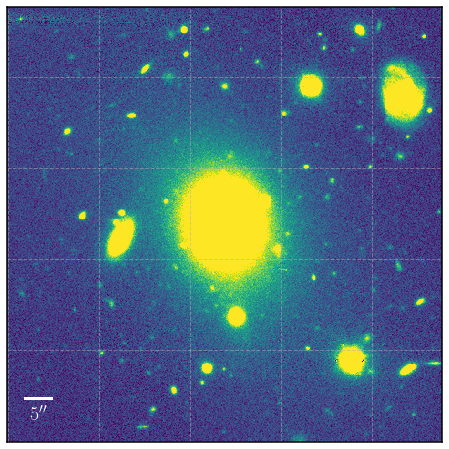

In [9]:
cutout_pdr2 = hsc_cutout(coord, cutout_size=s_ang, filters='i', archive=pdr2, 
                         use_saved=False, verbose=True, save_output=False)

img_pdr2 = cutout_pdr2[1].data
_ = plotting.display_single(img_pdr2)

cutout_pdr2.close()

### S17A Wide

/Users/song/Dropbox/work/project/unagi/unagi/config.py:816: UserWarning: # DR3 has become available now!
  warnings.warn("# DR3 has become available now!")


# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/s17a_wide/s17a_wide_tables.fits
# Retrieving cutout image in filter: i


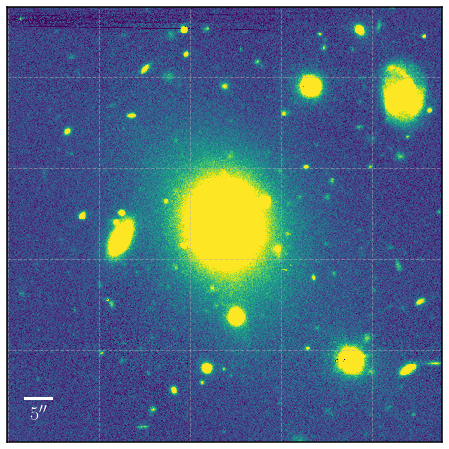

In [7]:
s17a = hsc.Hsc(dr='dr2', rerun='s17a_wide')

cutout_s17a = hsc_cutout(coord, cutout_size=s_ang, filters='i', archive=s17a, 
                         use_saved=False, verbose=True, save_output=False)

img_s17a = cutout_s17a[1].data
_ = plotting.display_single(img_s17a)

cutout_s17a.close()

### S18A Wide

* Now you will get a warning when using `DR2` since newer data release is available

/Users/song/Dropbox/work/project/unagi/unagi/config.py:816: UserWarning: # DR3 has become available now!
  warnings.warn("# DR3 has become available now!")


# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/s18a_wide/s18a_wide_tables.fits
# Retrieving cutout image in filter: g


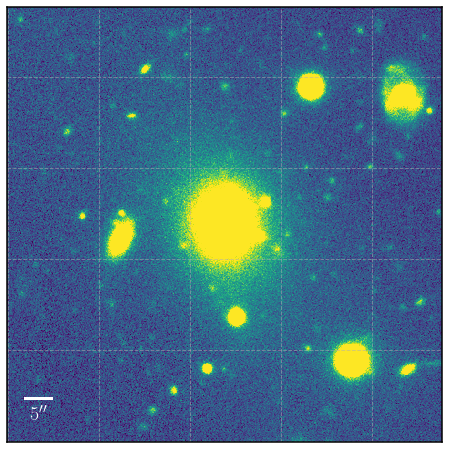

In [18]:
s18a = hsc.Hsc(dr='dr2', rerun='s18a_wide')

cutout_s18a = hsc_cutout(coord, cutout_size=s_ang, filters='g', archive=s18a, 
                         use_saved=False, verbose=True, save_output=False)

img_s18a = cutout_s18a[1].data
_ = plotting.display_single(img_s18a)

cutout_s18a.close()

### S19A Wide

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/s19a_wide/s19a_wide_tables.fits
# Retrieving cutout image in filter: g


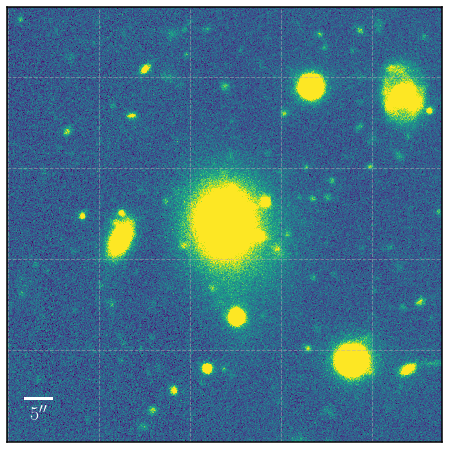

In [19]:
s19a = hsc.Hsc(dr='dr3', rerun='s19a_wide')

cutout_s19a = hsc_cutout(coord, cutout_size=s_ang, filters='g', archive=s19a, 
                         use_saved=False, verbose=True, save_output=False)

img_s19a = cutout_s19a[1].data
_ = plotting.display_single(img_s19a)

cutout_s19a.close()

### S20A Wide

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/s20a_wide/s20a_wide_tables.fits
# Retrieving cutout image in filter: i


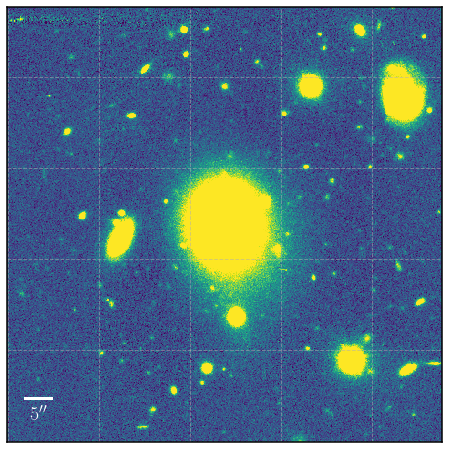

In [12]:
s20a = hsc.Hsc(dr='dr3', rerun='s20a_wide')

cutout_s20a = hsc_cutout(coord, cutout_size=s_ang, filters='i', archive=s20a, 
                         use_saved=False, verbose=True, save_output=False)

img_s20a = cutout_s20a[1].data
_ = plotting.display_single(img_s20a)

cutout_s20a.close()

### Visualize the differences

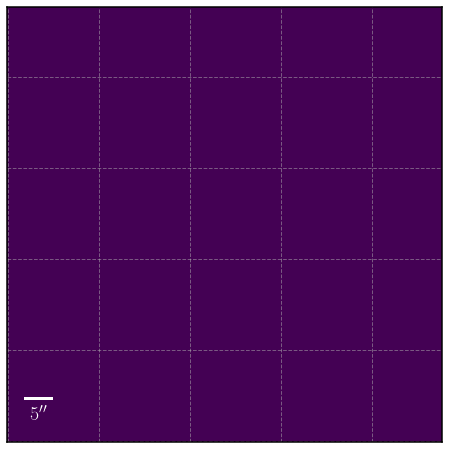

In [13]:
# S18A wide and PDR2 should be identical

_ = plotting.display_single(img_s18a - img_pdr2)

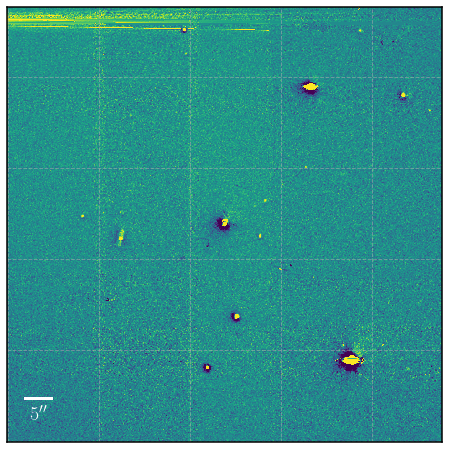

In [14]:
_ = plotting.display_single(img_s18a - img_s17a)

- Between S19A and S18A or PDR2, there are differences related to:
    1. Difference in astrometric calibration (in `DR3` we use the new `jointcal` algorithm).
    2. Difference in local background around bright object.

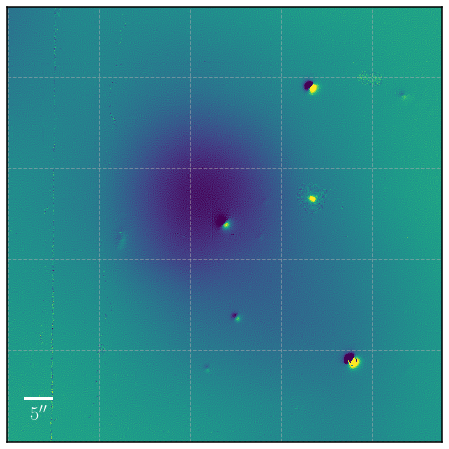

In [20]:
_ = plotting.display_single(img_s19a - img_s18a)

- `S20A` has the same issue 
    - The difference between `S20A` and `S19A` is caused by new exposures added to the coadd

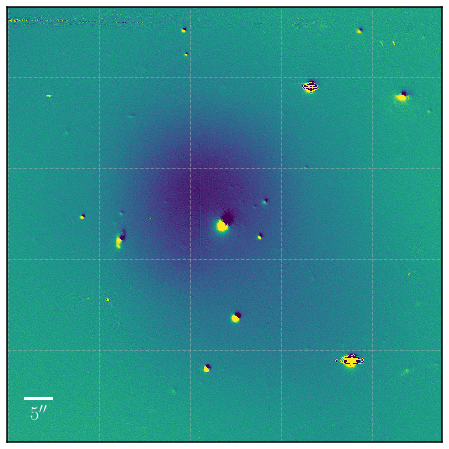

In [16]:
_ = plotting.display_single(img_s20a - img_s18a)

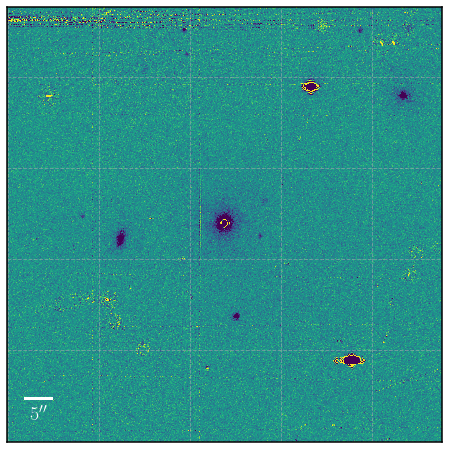

In [17]:
_ = plotting.display_single(img_s20a - img_s19a)

## `deepCoadd` v.s. `deepCoadd-calexp`

- The default coadd data product is called `deepCoadd-calexp` within the `hscPipe`. 
- In `S18A`, one major update is the global background subtraction which improves the sky subtraction, especially around bright/extended sources.
- However, this causes a lot of problems for the pipeline:

> The sky subtraction based on a global-background pattern has been updated, in which an order of procedure has been reorganized to reduce residual patterns, especially in the field edges. 3) In the last production, we suffered from long processing time for deblending, which was mostly due to large footprints particularly arising around bright sources, satellite trails, or such artifacts. Imperfect detection completeness of faint sources was also reported. To mitigate these issues, we have applied relatively aggressive local sky subtraction in detection with 128px meshes after the global sky subtraction.

- So since `S19A`, the aggressive "local" sky subtraction is applied again to generate the default coadd image for deblending and photometric measurements. The product before the local subtraction still exists as the `deepCoadd` files. 
- Also since `S19A`, the image cutout API adds a new image type `coadd/bg` to help you get these files. If you want to have image of bright object without the over-subtracted background, you will want to use this version.

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/s20a_wide/s20a_wide_tables.fits
# Retrieving cutout image in filter: i
# Retrieving cutout image in filter: i


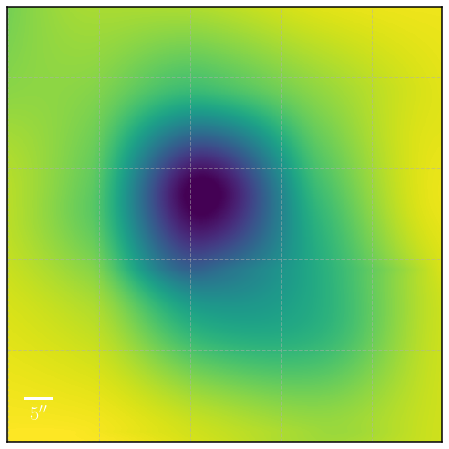

In [121]:
s20a = hsc.Hsc(dr='dr3', rerun='s20a_wide')

# This is the default coadd image
cutout_s20a_1 = hsc_cutout(
    coord, cutout_size=s_ang, filters='i', archive=s20a, 
    img_type='coadd', use_saved=False, verbose=True, save_output=False)

# This is the coadd/bg image with global background subtraction
cutout_s20a_2 = hsc_cutout(
    coord, cutout_size=s_ang, filters='i', archive=s20a, 
    img_type='coadd/bg', use_saved=False, verbose=True, save_output=False)

# The difference of the background
_ = plotting.display_single(cutout_s20a_1[1].data - cutout_s20a_2[1].data)

cutout_s20a_1.close()
cutout_s20a_2.close()

- You can also generate color pictures using the `coadd/bg` product now

In [128]:
color_s20a, wcs_s20a = hsc_tricolor(
    coord, cutout_size=s_ang, filters='gri', archive=s20a, 
    img_type='coadd/bg', use_saved=False, verbose=True, save_img=False)

# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: r
# Retrieving cutout image in filter: i


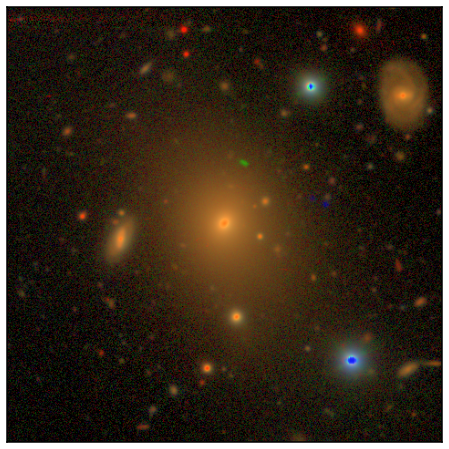

In [129]:
fig = plt.subplots(figsize=(8,8))
plt.imshow(color_s20a, origin='lower')
plt.xticks([])
plt.yticks([])
plt.show()